In this notebook I will extract the density of the functional group that might be in the active layer.


In [2]:
import os
import numpy as np
import pandas as pd
from scipy import optimize
from scipy import linalg
from scipy.interpolate import UnivariateSpline
import matplotlib
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns
import random
import pylab
from scipy import stats
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import inverse_method_funs as inv

In [3]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Read wideband frequency response
Read the Echoview export of wideband frequency response. sv pulse compressed.

In [4]:
for fname_EV = 'D:/GLIDER2018/Echosounder/Flaket_SSL/Wideband_21061018.csv'
freqs_EV, sv, times = inv.read_widebandfrequencyresponse(fname_EV, extracols = 0)


# Read scattering models
Import species backscattering cross section matrix

In [5]:
# Sigmabs from ZooScatR model runs + viscous elactic model for mean of fish larvae model by ve=True)
fname_sim = '../ZooScatStuff/my_simplified_data.feather'
specs, freqs_sim, sig_bs_mean = inv.read_scatteringmodelsimulations(fname_sim, nsim=1000, ve=True)

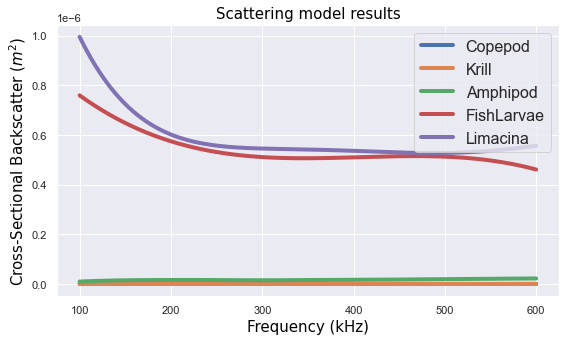

In [6]:
fig=plt.figure(figsize=(9, 5),facecolor='w', edgecolor='k')
plt.plot(freqs_sim,sig_bs_mean, linewidth=4)
plt.legend(specs, fontsize=16)
plt.ylabel('Cross-Sectional Backscatter ($m^{2}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)
plt.title('Scattering model results', title_font);

# Resample to line up output and input

In [7]:
sigbs_mean = np.zeros([len(freqs_EV),len(specs)])

for ind_spec in range(0,len(specs)):
    f = UnivariateSpline(freqs_sim,sig_bs_mean[:, ind_spec], k=5)
    sigbs_mean[:,ind_spec] = f(freqs_EV)

# IIM

Run a least squares solver

In [8]:
density = np.zeros([np.shape(sigbs_mean)[1], np.shape(sv)[1]])
sigbs = sigbs_mean
for ind in range(0, np.shape(sv)[1]):
    d = optimize.lsq_linear(sigbs, sv[:,ind], bounds=(0,np.inf))
    density[:,ind] = d.x

Text(0.5, 0, 'Functional group')

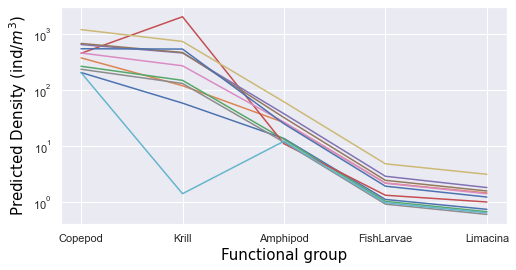

In [9]:
fig, ax=plt.subplots(figsize=(8, 4),facecolor='w', edgecolor='k')
plt.semilogy(specs,density)
#ax.bar(specs,density[:,1])
plt.ylabel('Predicted Density (ind/$m^3$)', axis_font)
plt.xlabel('Functional group', axis_font)


No handles with labels found to put in legend.


Text(0.5, 0, 'Frequency (kHz)')

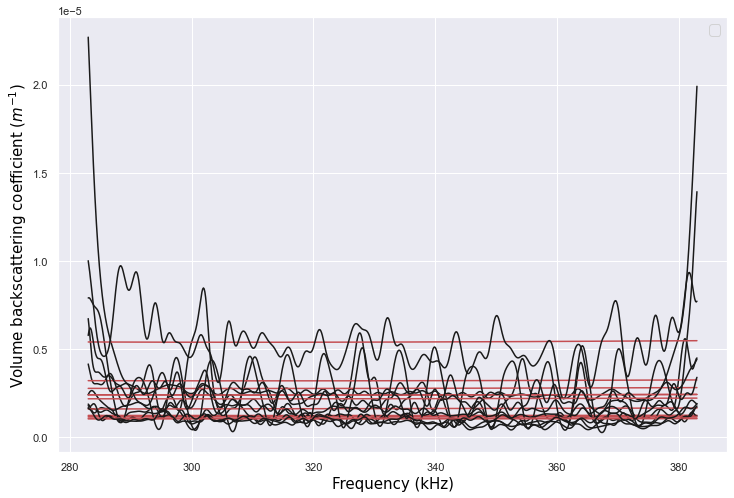

In [10]:
fig=plt.figure(figsize=(12, 8))
for ind in range(0, np.shape(sv)[1]):
    plt.plot(freqs_EV,np.sum(sigbs*density[:,ind],1),'r', freqs_EV ,sv[:,ind],'k')

plt.legend(fontsize=14)
plt.ylabel('Volume backscattering coefficient ($m^{-1}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)